The multi-layer perceptron (MLP) architecture is made up of neurons that are stacked in layers on top of each other, with weight connections. This architecture consists of an input layer, one or more hidden layers, and an output layer.

In order to use an MLP on a 2D image, we must first flatten the image. This notebook demonstrates how to do that and the inherent issues with this approach. We will use the MNIST dataset.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

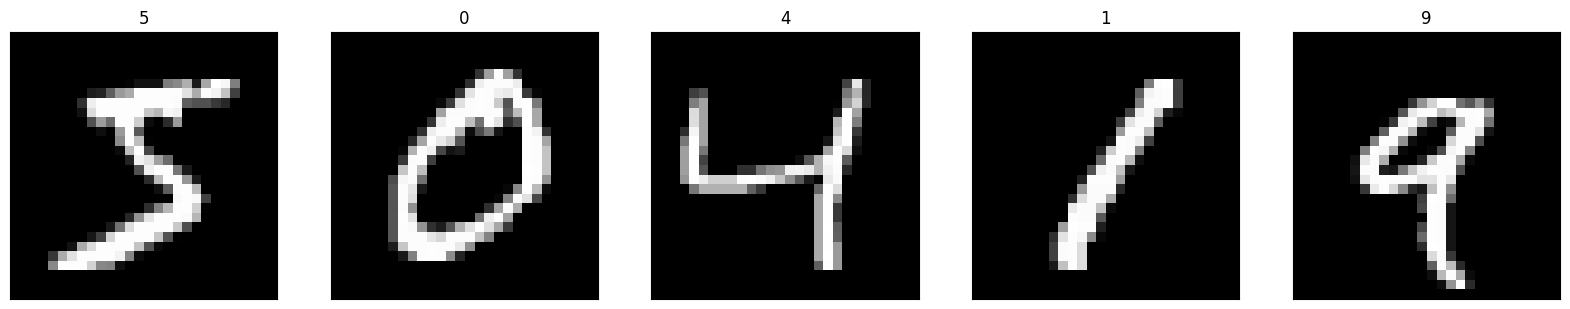

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot training images
fig = plt.figure(figsize=(20,20))
for i in range (5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

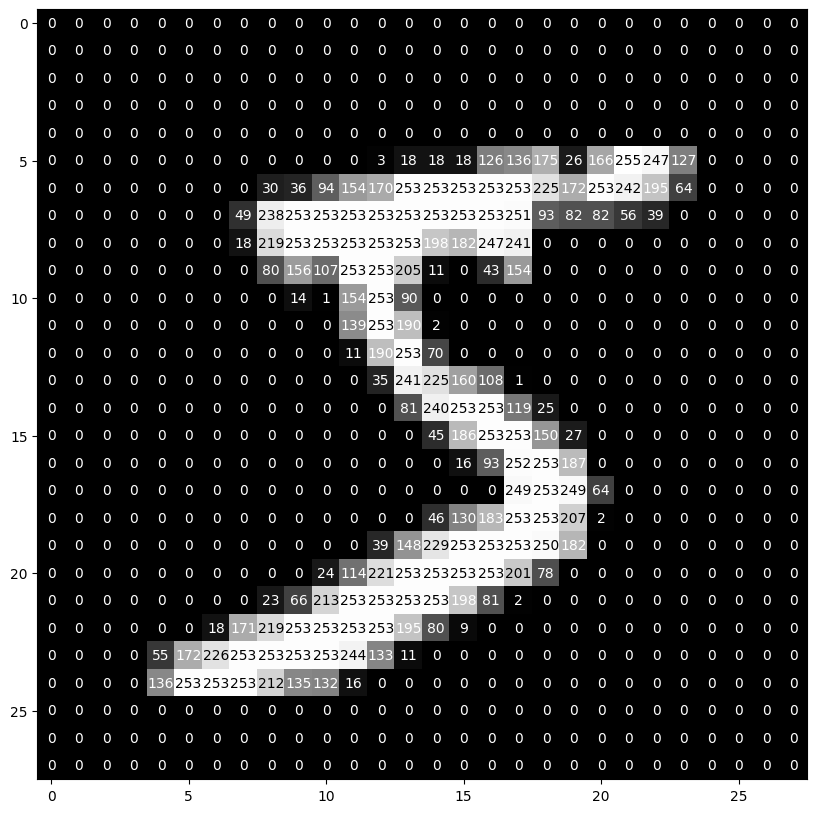

In [16]:
# Visualize a single image
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
img = X_train[0]
ax.imshow(img, cmap='gray')
w,h = img.shape
for x in range(w):
    for y in range(h):
        ax.annotate(img[x][y], xy=(y,x), horizontalalignment='center', verticalalignment='center',
                    color='white' if img[x][y]<200 else 'black')

In order to pass the image into a MLP, it must be flatten. As we can see, the flatten image loses 
spatial informaiton.

In [21]:
flat_img = img.flatten()
print(flat_img)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   